# Homework 2

## Student Information<a id = "student_information"></a>

Fill out the following fields:

In [ ]:
# Student name:   
# Student e-mail: 
# Student ID:     

## Assignment Information<a id = "assignment_information"></a>

<table style = "display: block; align: left;">
    <tr>
        <th style = "text-align: left;">Course</th>
        <th>:</th>
        <td style = "text-align: left;">Introduction to Computational Physics (PHYS 220)</td>
    </tr>
    <tr>
        <th style = "text-align: left;">Semester</th>
        <th>:</th>
        <td style = "text-align: left;">Spring 2019</td>
    </tr>
    <tr>
        <th style = "text-align: left;">Instructor</th>
        <th>:</th>
        <td style = "text-align: left;">Dr. Zhibo Zhang</td>
    </tr>
    <tr>
        <th style = "text-align: left;">Instructor E-mail</th>
        <th>:</th>
        <td style = "text-align: left;"><a href = "mailto:Zhibo.Zhang@UMBC.edu">Zhibo.Zhang@UMBC.edu</a></td>
    </tr>
    <tr>
        <th style = "text-align: left;">Teaching Assistant</th>
        <th>:</th>
        <td style = "text-align: left;">Erick Edward Shepherd</td>
    </tr>
    <tr>
        <th style = "text-align: left;">Teaching Assistant E-mail</th>
        <th>:</th>
        <td style = "text-align: left;"><a href = "mailto:ErickShepherd@UMBC.edu">ErickShepherd@UMBC.edu</a></td>
    </tr>
    <tr>
        <th style = "text-align: left;">Institution</th>
        <th>:</th>
        <td style = "text-align: left;"><a href = "www.umbc.edu">University of Maryland, Baltimore County (UMBC)</a></td>
    </tr>
    <tr>
        <th style = "text-align: left;">Department</th>
        <th>:</th>
        <td style = "text-align: left;"><a href = "www.physics.umbc.edu">Department of Physics</a></td>
    </tr>
    <tr>
        <th style = "text-align: left;">Assignment</th>
        <th>:</th>
        <td style = "text-align: left;">Homework 2 of 7</td>
    </tr>
    <tr>
        <th style = "text-align: left;">Due Date<a id = "due_date"></a></th>
        <th>:</th>
        <td style = "text-align: left;">Tuesday, February 26th, 2019, 11:59 PM (EDT)</td>
    </tr>
    <tr>
        <th style = "text-align: left;">Assignment Value</th>
        <th>:</th>
        <td style = "text-align: left;">6.67% of the course grade</td>
    </tr>
    <tr>
        <th style = "text-align: left;">Programming Language</th>
        <th>:</th>
        <td style = "text-align: left;">Python 3</td>
    </tr>
</table>

## Assignment Description<a id = "assignment_description"></a>

A set of simple warmup exercises. Each of these problems should require nothing more than the standard Python syntax to solve: i.e., you do not need to import any modules or packages. This assignment also doubles as practice using Jupyter Notebooks.

## Submission Instructions<a id = "submission_instructions"></a>

Submit this assignment via the course Blackboard by the listed [due date and time](#due_date). If you have issues uploading the assignment to Blackboard, E-mail your submission to [ErickShepherd@UMBC.edu](mailto:ErickShepherd@UMBC.edu) by the same deadline. Be sure to fill out the filename template:

* **`[Assignment] - [First_Name] [Last_Name].ipynb`**

Similarly, if you have to submit multiple files for this assigment, please put them all into a single zip folder using the same naming style.

This document was initially written as a Python 3 Jupyter Notebook and is intended to be read and completed as such. However, if you are instead reading the PDF version of this document, write your coded and commented solutions to each problem in a separate Python `.py` file following the same file naming style.

e.g., if your name is *John Smith* and you are submitting *Homework 4*, your submission should be either the Jupyter Notebook named **`Homework 4 - John Smith.ipynb`**, a Python `.py` file named **`Homework 4 - John Smith.py`**, or the folder named **`Homework 4 - John Smith.zip`**.

Additionally, remember to fill out the [Student Information](#student_information) section prior to submission. If you are completing this assignment as a Python `.py` file, add similar documentation identifying the author in a comment at the beginning of the document.

* **Note:** You do not need to include the `.ipynb_checkpoints` directory or any files contained therein in your submission.

## Table of Contents

> * **[Assignment Information](#assignment_information)**
> * **[Assignment Description](#assignment_description)**
> * **[Submission Instructions](#submission_instructions)**
> * **[Student Information](#student_information)**
> * **[Problem 1 (40%) - Maximum of Three](#problem1)**
> * **[Problem 2 (20%) - List Maximum](#problem2)**
> * **[Problem 3 (20%) - Summation and Multiplication](#problem3)**
> * **[Problem 4 (20%) - List and String Length](#problem4)**

## Setup Code

No work is required at this point. However, subsequent problems depend on the imports and functions from this code cell. Re-run the below code cell if `NameError`s occur elsewhere in the document.

In [1]:
# Standard library imports.
import datetime

# Third party imports.
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc

reference_date = datetime.datetime(1800, 1, 1)


def load_data_from_nc():
    
    """
    
    Loads air temperature data from NetCDF file.
            
    """
    
    with nc.Dataset("air.mon.mean.nc", "r") as file_data:
    
        latitudes        = np.array(file_data.variables["lat"][:])
        longitudes       = np.array(file_data.variables["lon"][:])
        times            = np.array(file_data.variables["time"][:]) 
        air_temperatures = np.array(file_data.variables["air"][:])
    
    # Converts time data from Unix/POSIX time to Gregorian time.
    times = np.array([reference_date + datetime.timedelta(hours = x) for x in times])
    
    return latitudes, longitudes, times, air_temperatures


def load_data_from_npz():
    
    """
    
    Loads air temperature data from NumPy savez file.
            
    """
    
    with np.load("data.npz") as file_data:
    
        latitudes        = file_data["lats"][:]
        longitudes       = file_data["lons"][:]
        times            = file_data["time"][:]
        air_temperatures = file_data["air"][:]
    
    # Converts time data from Unix/POSIX time to Gregorian time.
    times = np.array([reference_date + datetime.timedelta(hours = x) for x in times])
    
    return latitudes, longitudes, times, air_temperatures


"""

Data fields:
    
    Latitudes:
        Shape: (73,) -> (latitudes,)
        Range: -90 <= latitude <= 90
        Units: Degrees

    Longitudes:
        Shape: (144,) -> (longitudes,)
        Range: 0 <= longitude <= 357.5
        Units: Degrees

    Time:
        Shape: (829,) -> (time,)
        Range: 1297320.0 <= time <= 1902192.0
        Units: Hours since 1800-01-01 00:00:0.0 (UTC)
        Start: 1948-01-01 00:00:0.0 (UTC)
        End:   2017-01-01 00:00:0.0 (UTC)
        Notes: Each time stamp is spaced one month apart.

    Air temperature:
        Shape: (829, 73, 144) -> (time, latitudes, longitudes)
        Range: -73.78 <= temperature <= 41.749
        Units: Degrees centigrade

"""

'\n\nData fields:\n    \n    Latitudes:\n        Shape: (73,) -> (latitudes,)\n        Range: -90 <= latitude <= 90\n        Units: Degrees\n\n    Longitudes:\n        Shape: (144,) -> (longitudes,)\n        Range: 0 <= longitude <= 357.5\n        Units: Degrees\n\n    Time:\n        Shape: (829,) -> (time,)\n        Range: 1297320.0 <= time <= 1902192.0\n        Units: Hours since 1800-01-01 00:00:0.0 (UTC)\n        Start: 1948-01-01 00:00:0.0 (UTC)\n        End:   2017-01-01 00:00:0.0 (UTC)\n        Notes: Each time stamp is spaced one month apart.\n\n    Air temperature:\n        Shape: (829, 73, 144) -> (time, latitudes, longitudes)\n        Range: -73.78 <= temperature <= 41.749\n        Units: Degrees centigrade\n\n'

## Problem 1 (40%) - Simple Numpy Exercises<a id = "problem1"></a>

> **Problem value:** 40% of assignment grade.

Use the air temperature data to do the following exercises:
1. Reshape the air temperature array into a 4-dimentional array of shape `(years, months, latitudes, longitudes)`, or `(69, 12, 73, 144)`. Discard the last time value for the month of January, 2017.
2. Derive and plot the annual mean global mean temperature over the last 69 years. It should resemble the following:
<img src = "Problem 1.2.png" style = "width: 50%;">
3. Derive and plot the 69-year averaged seasonal cycle of global mean temperature. It should resemble the following:
<img src = "Problem 1.3.png" style = "width: 50%;">
4. Derive and plot the temperatures of the Summer months of the United States (June, July, August) over the last 69 years. It should resemble the following:
<img src = "Problem 1.3.png" style = "width: 50%;">

Dataset array shapes:
Latitudes:        (73,)
Longitudes:       (144,)
Times:            (829,)
Air temperatures: (829, 73, 144)


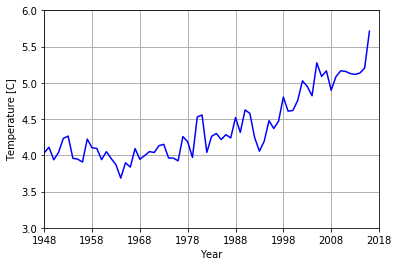

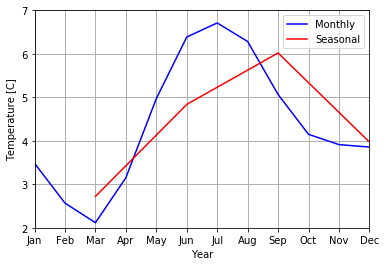

In [2]:
# Loads the data from the netCDF4 file.
latitudes, longitudes, times, air_temperatures = load_data_from_nc()

print("Dataset array shapes:")
print("Latitudes:        {}".format(latitudes.shape))
print("Longitudes:       {}".format(longitudes.shape))
print("Times:            {}".format(times.shape))
print("Air temperatures: {}".format(air_temperatures.shape))

# ---------------------------------
# Write your code below this point.
# ---------------------------------
air_temperatures = air_temperatures[:69 * 12].reshape((69, 12, 73, 144))

years, months, seasons = np.arange(69) + 1948, np.arange(12), 2 + np.arange(4) * 3

annual_mean_temp = np.mean(air_temperatures, axis=(1, 2, 3))
monathal_mean_temp = np.mean(air_temperatures, axis=(0, 2, 3))
seasonal_mean_temp = np.mean(np.array(np.split(monathal_mean_temp, 4)), 1)

plt.figure()

plt.plot(years, annual_mean_temp, 'b')

plt.xlabel('Year')
plt.ylabel('Temperature [C]')

plt.ylim(3, 6)
plt.xlim(1948, 2018)

plt.gca().set_xticks(np.arange(1948, 2019, 10))
plt.grid(linestyle='-', linewidth=1)

plt.show()


plt.figure()

plt.plot(months, monathal_mean_temp, 'b')
plt.plot(seasons, seasonal_mean_temp, 'r')

plt.xlabel('Month')
plt.ylabel('Temperature [C]')
plt.legend(['Monthly', 'Seasonal'], loc='upper right')

plt.ylim(2, 7)
plt.xlim(0, 11)

plt.gca().set_xticks(np.arange(12))
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(linestyle='-', linewidth=1)

plt.show()
# ---------------------------------
# Write your code above this point.
# ---------------------------------


In [ ]:
seasonal_mean_temp

## Problem 2 (20%) - Line Plot<a id = "problem2"></a>

> **Problem value:** 20% of assignment grade.

Plot the following figure using Numpy & Matplotlib. Your figure needs to closely resemble the figure below, including:
1. Proper labels and limits for the $x$-axis and $y$-axis utilizing $LaTeX$ where appropriate
2. Latex symbols for the $x$-axis ticks
3. A legend
4. Gridlines

<img src = "Problem 2.png" style = "width: 50%;">

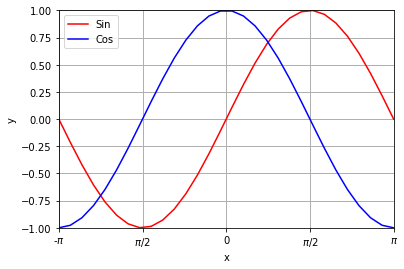

In [3]:
x      = np.linspace(-np.pi, np.pi, 30)
cosine = np.cos(x)
sine   = np.sin(x)

plt.figure()

# ---------------------------------
# Write your code below this point.
# ---------------------------------
plt.plot(x, sine, 'r')
plt.plot(x, cosine, 'b')

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-np.pi, +np.pi)
plt.ylim(-1, +1)

ax = plt.gca()
ax.set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
ax.set_xticklabels(['-$\pi$', '$\pi$/2', '0', '$\pi$/2', '$\pi$'])

plt.legend(['Sin', 'Cos'], loc='upper left')
plt.grid(linestyle='-', linewidth=1)
# ---------------------------------
# Write your code above this point.
# ---------------------------------

plt.show()

## Problem 3 (20%) - Scatter Plot<a id = "problem3"></a>

> **Problem value:** 20% of assignment grade.

Plot the following figure using Numpy & Matplotlib. Your figure needs to closely resemble the figure below, including:
1. Proper labels and limits for the $x$-axis and $y$-axis, using $LaTeX$ where appropriate
2. Annotations
3. Gridlines

<img src = "Problem 3.png" style = "width: 50%;">

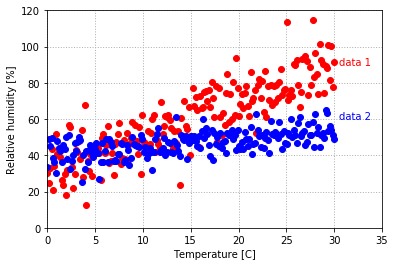

In [4]:
"""

Glossary:
 * T:  Temperature
 * RH: Relative humidity

"""

T    = np.linspace(0,30,200)
dRH1 = 10.0
dRH2 = 5.0
RH1  = 2.0 * T + 30.0 + dRH1 * np.random.randn(T.size)
RH2  = 0.5 * T + 40.0 + dRH2 * np.random.randn(T.size)

plt.figure()

# ---------------------------------
# Write your code below this point.
# ---------------------------------
plt.plot(T, RH1, 'ro')
plt.plot(T, RH2, 'bo')

plt.xlabel('Temperature [C]')
plt.ylabel('Relative humidity [%]')

plt.xlim(0, 35)
plt.ylim(0, 120)

ax = plt.gca()
ax.annotate('data 1', xy=(0, 0), xytext=(30.5, 90), color='r')
ax.annotate('data 2', xy=(0, 0), xytext=(30.5, 60), color='b')

plt.grid(linestyle=':', linewidth=1)
# ---------------------------------
# Write your code above this point.
# ---------------------------------

plt.show()

## Problem 4 (20%) - 2D Contour Plot<a id = "problem4"></a>

> **Problem value:** 20% of assignment grade.

The relative humidity ($RH$) is a function of temperature ($T$) and pressure ($P$) as follows:

$RH(T,P)=\frac{P}{100}{e}^{\frac{12T}{T+243}}$

where, $P$ (in Pascals) varies from $600$ to $1000$ and $T$ (in Celsius) varies from $0^{\circ}$ to $30^{\circ}$. Make a contour plot of $RH$ as a function of $T$ ($x$-axis) and $P$ ($y$-axis). Your plot should resemble the below figure, including:
1. Proper labels and limits for the $𝑥$-axis and $𝑦$-axis utilizing $LaTeX$ where appropriate
2. A colorbar
3. A "jet" colormap

<img src = "Problem 4.png" style = "width: 50%;">

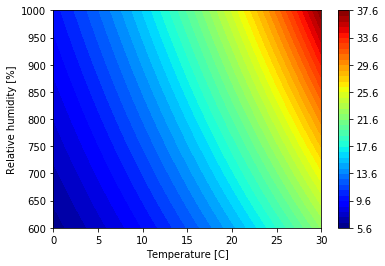

In [5]:
T = np.linspace(0, 30, 50)
P = np.linspace(600, 1000, 50)

RH = np.outer((P / 100), np.exp(12 * T / (T + 243)))

plt.figure()
# ---------------------------------
# Write your code below this point.
# ---------------------------------
plt.contourf(T, P, RH, 50, cmap='jet')
plt.colorbar()

plt.xlabel('Temperature [C]')
plt.ylabel('Relative humidity [%]')

plt.xlim(0, 30)
plt.ylim(600, 1000)

ax = plt.gca()
# ---------------------------------
# Write your code above this point.
# ---------------------------------

plt.show()

<span style = "display: block; text-align:center;">Co-authored by Dr. Zhibo Zhang and Erick Edward Shepherd.</span>

<span style = "display: block; text-align:center;">Copyright © 2019 of Dr. Zhibo Zhang</span>